# Generate an execution time prediction for all layers in a model
In this notebook we predict the execution time of one forward/backward pass of the VGG-16 model on a given GPU.

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
import importlib
import pkg_resources

import mlpredict
import mlpredict.api

### Select the deep neural network and the GPU whose performance should be predicted, select optimizer
The DNN definition has be read from a json file generated from a model class instance. The GPU definition has to be read from a json file stating the parameters "bandwidth", "cores", and "clock"

In [8]:
dnn = 'VGG16'
gpu = 'V100'
opt = 'SGD'

In [12]:
# Set paths
MODEL_PATH = pkg_resources.resource_filename('mlpredict', 'dnn_architecture/%s.json' %dnn)
GPU_PATH = pkg_resources.resource_filename('mlpredict', 'GPUs/%s.json' %gpu)

### Import model
mlpredict.api.import_model returns an instance of the dnn class defined in api.py

In [13]:
VGG16 = mlpredict.api.import_model(MODEL_PATH)

### Predict execution time for a range of batch sizes

In [14]:
batchsize = 2**np.arange(0,6,1)
t = np.zeros([16,6])
time = np.zeros(6)

for i in range(len(batchsize)):
    time[i], l, t[:,i] = VGG16.predict(GPU_PATH,
                                       optimizer = opt,
                                       batchsize = batchsize[i])

INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables


/Users/djustus/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables
INFO:tensorflow:Restoring parameters from /Users/djustus/Library/Caches/Python-Eggs/mlpredict-0.0.1-py3.6.egg-tmp/mlpredict/model/model_all/variables/variables


### Remove duplicate layers

In [15]:
l_unique = l.copy()
duplicates = [12,11,9,6]
for d in duplicates:
    print(l_unique[d])
    l_unique.pop(d)
    
t_unique = np.delete(t,duplicates,0)

conv5_3
conv5_2
conv4_3
conv3_3


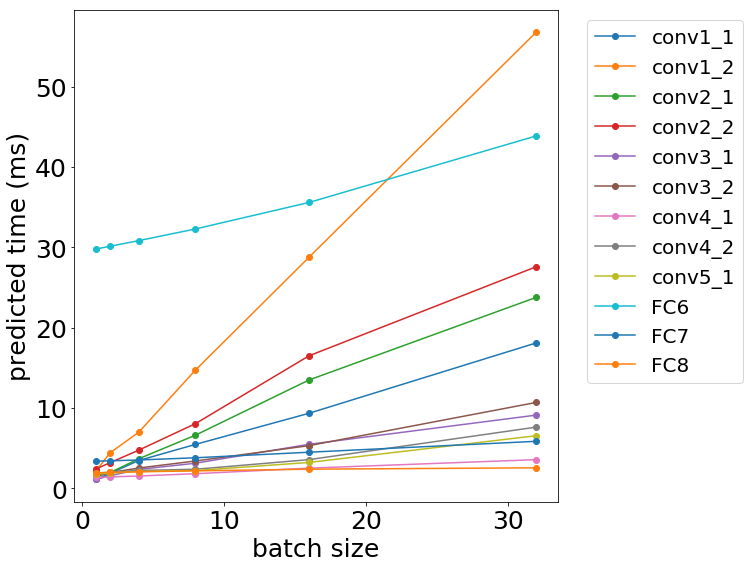

In [16]:
fig,ax = plt.subplots(1,1,figsize=[8,8])
plt.plot(batchsize,t_unique.transpose(),'o-')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.yaxis.set_minor_formatter(plt.NullFormatter())

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

plt.xlabel('batch size',fontsize=25)
plt.ylabel('predicted time (ms)',fontsize=25)

plt.legend(l_unique,bbox_to_anchor=(1.04,1), loc="upper left",fontsize=20)

plt.tight_layout()

plt.show()